## Modelo para predecir la calidad del vino a partir de su composición química utilizando modelos de regularización Ridge, Lasso y ElasticNet

### Importando las librerías básicas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (10, 6)

import warnings
warnings.filterwarnings('ignore')

### Importando los métodos asociados a regularización

In [2]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import median_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Importando el dataset

> Importando datos de winequality-red

In [4]:
df = pd.read_csv('winequality-red.csv')


### Observando el conjunto de datos

> Imprimimos las primeras y últimas 5 observaciones

> Observamos que hay 1599 observaciones, 11 atributos y un vector objetivo

In [5]:
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [22]:
df.rename (columns = {"fixed acidity": "fixed_acidity", "volatile acidity": "volatile_acidity", 
                      "citric acid": "citric_acid", "residual sugar": "residual_sugar",
                       "free sulfur dioxide": "free_sulfur_dioxide", "total sulful dioxide": "total_sulfur_dioxide"},
                        inplace = True)

#### Pequeño resumen de los atributos:

1. **`fixed acidity`:** Cantidad de ácido tártico en el vino.
2. **`volatile acidity`:** Cantidad de ácido acético en el vino.
3. **`citric acid`:** Es una propiedad que proporciona frescura al vino.
4. **`residual sugar`:** Cantidad de azúcar que queda después de la fermentación.
5. **`chlorides`:** Cantidad de sal en el vino.
6. **`free sulfur dioxide`:** Dióxido de azufre que se encuentra en estado libre en el vino.
7. **`total sulfur dioxide`:** Cantidad total de dióxido de azufre que se encuentra en el vino.
8. **`density`:** Densidad del vino.
9. **`pH`:** Acidez o alcalinidad del vino en una escala de 0 a 14.
10. **`sulphates`:** Es una sal que contribuye a la preservación del vino.
11. **`alcohol`:** Contenido de alcohol del vino.
12. **`quality`:** Vector objetivo. Representa la calidad percibida del vino por expertos.

### Método describe() en el dataset

> El método describe() puede mostrar diferentes valores, como la cantidad, promedio, desviación estándard, valor mínimo, etc. de las variables numéricas

In [23]:
df.describe()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free_sulfur_dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

### Método info()

> Aplicamos este método para ver el tipo de dato y la cantidad de nulos de los atributos

> Vemos que no hay valores nulos en ninguna variable, además que todos los atributos son numéricos

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Observamos los valores atípicos de cada variable

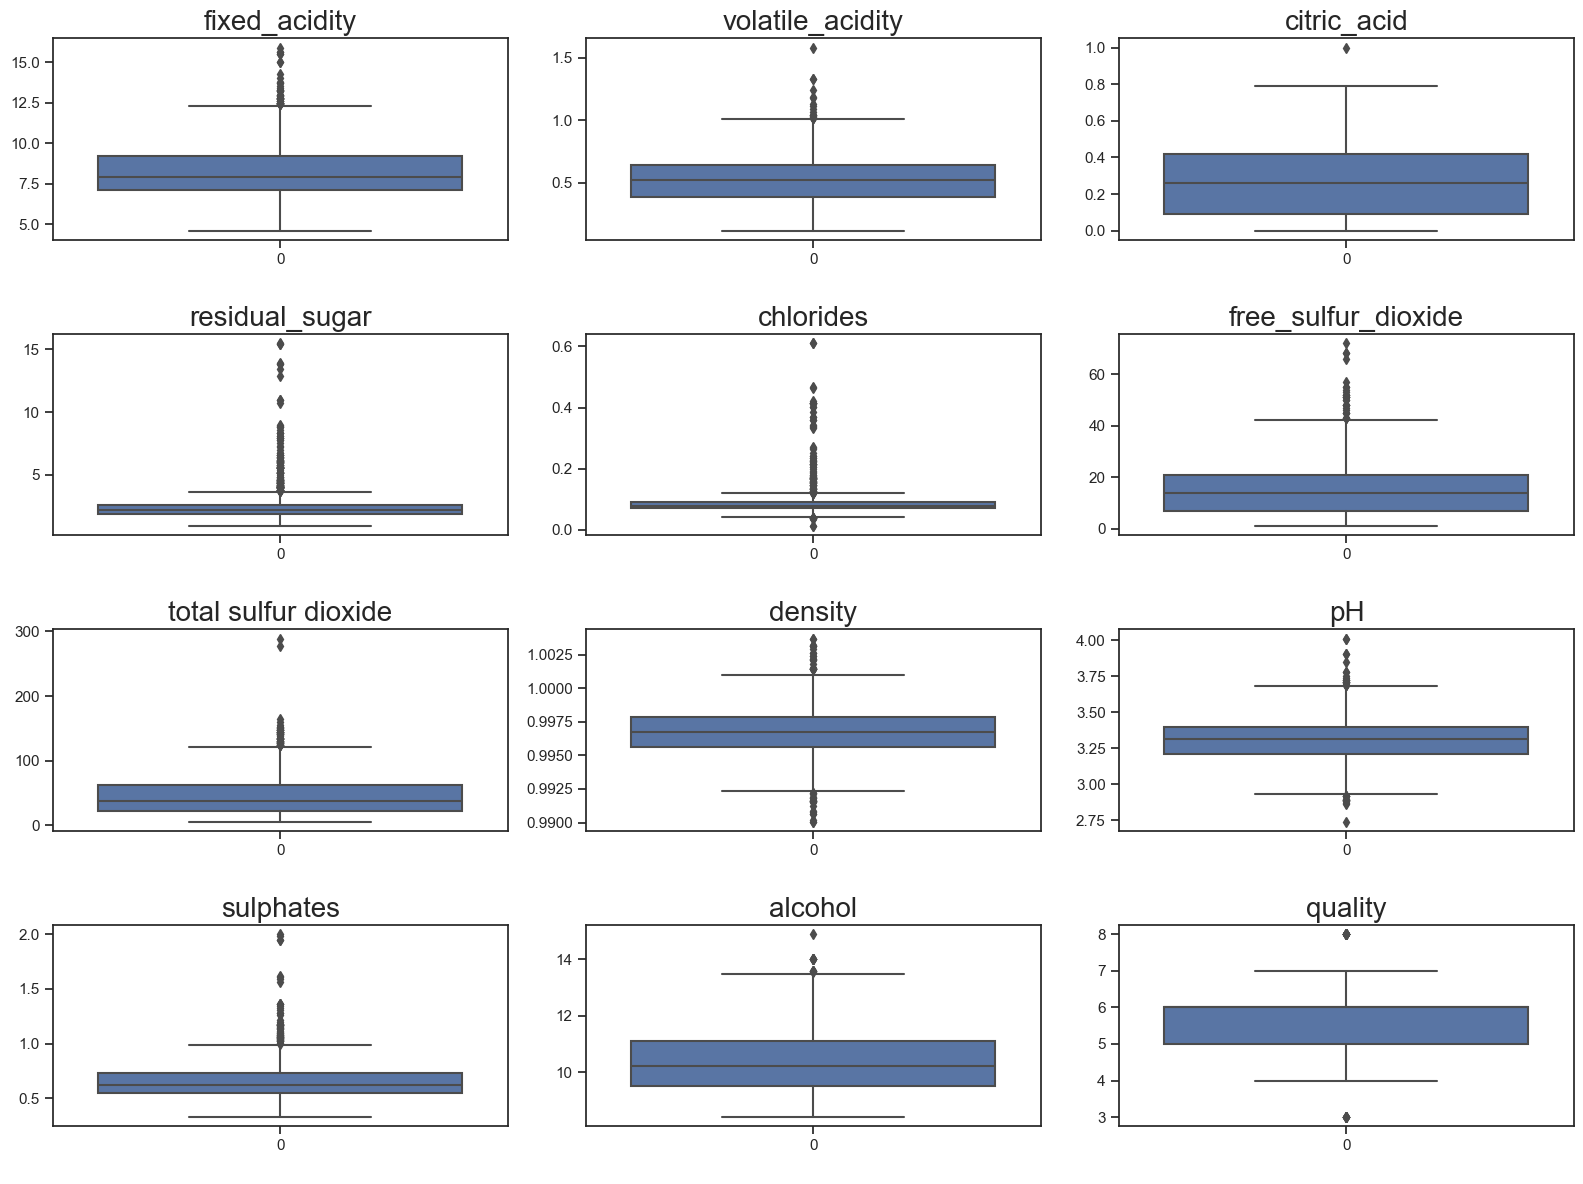

In [25]:
cols = 3
rows = int (df.shape[1] / cols) #definimos cuantos graficos haremos 3 columnas x 4 filas
size_fact = 4
plt.figure (figsize=(rows*size_fact, cols*size_fact)) #tamaño de los graficos
for i, col in enumerate (df.columns) :
    plt.subplot (rows, cols, i+1) #definimos donde va el subplot con i
    sns.boxplot (df[col]) #graficamos la columna col
    plt.title (col, fontsize = 20)
    plt.xlabel (" ")
    plt.tight_layout() #afinamos el espacio entre graficos

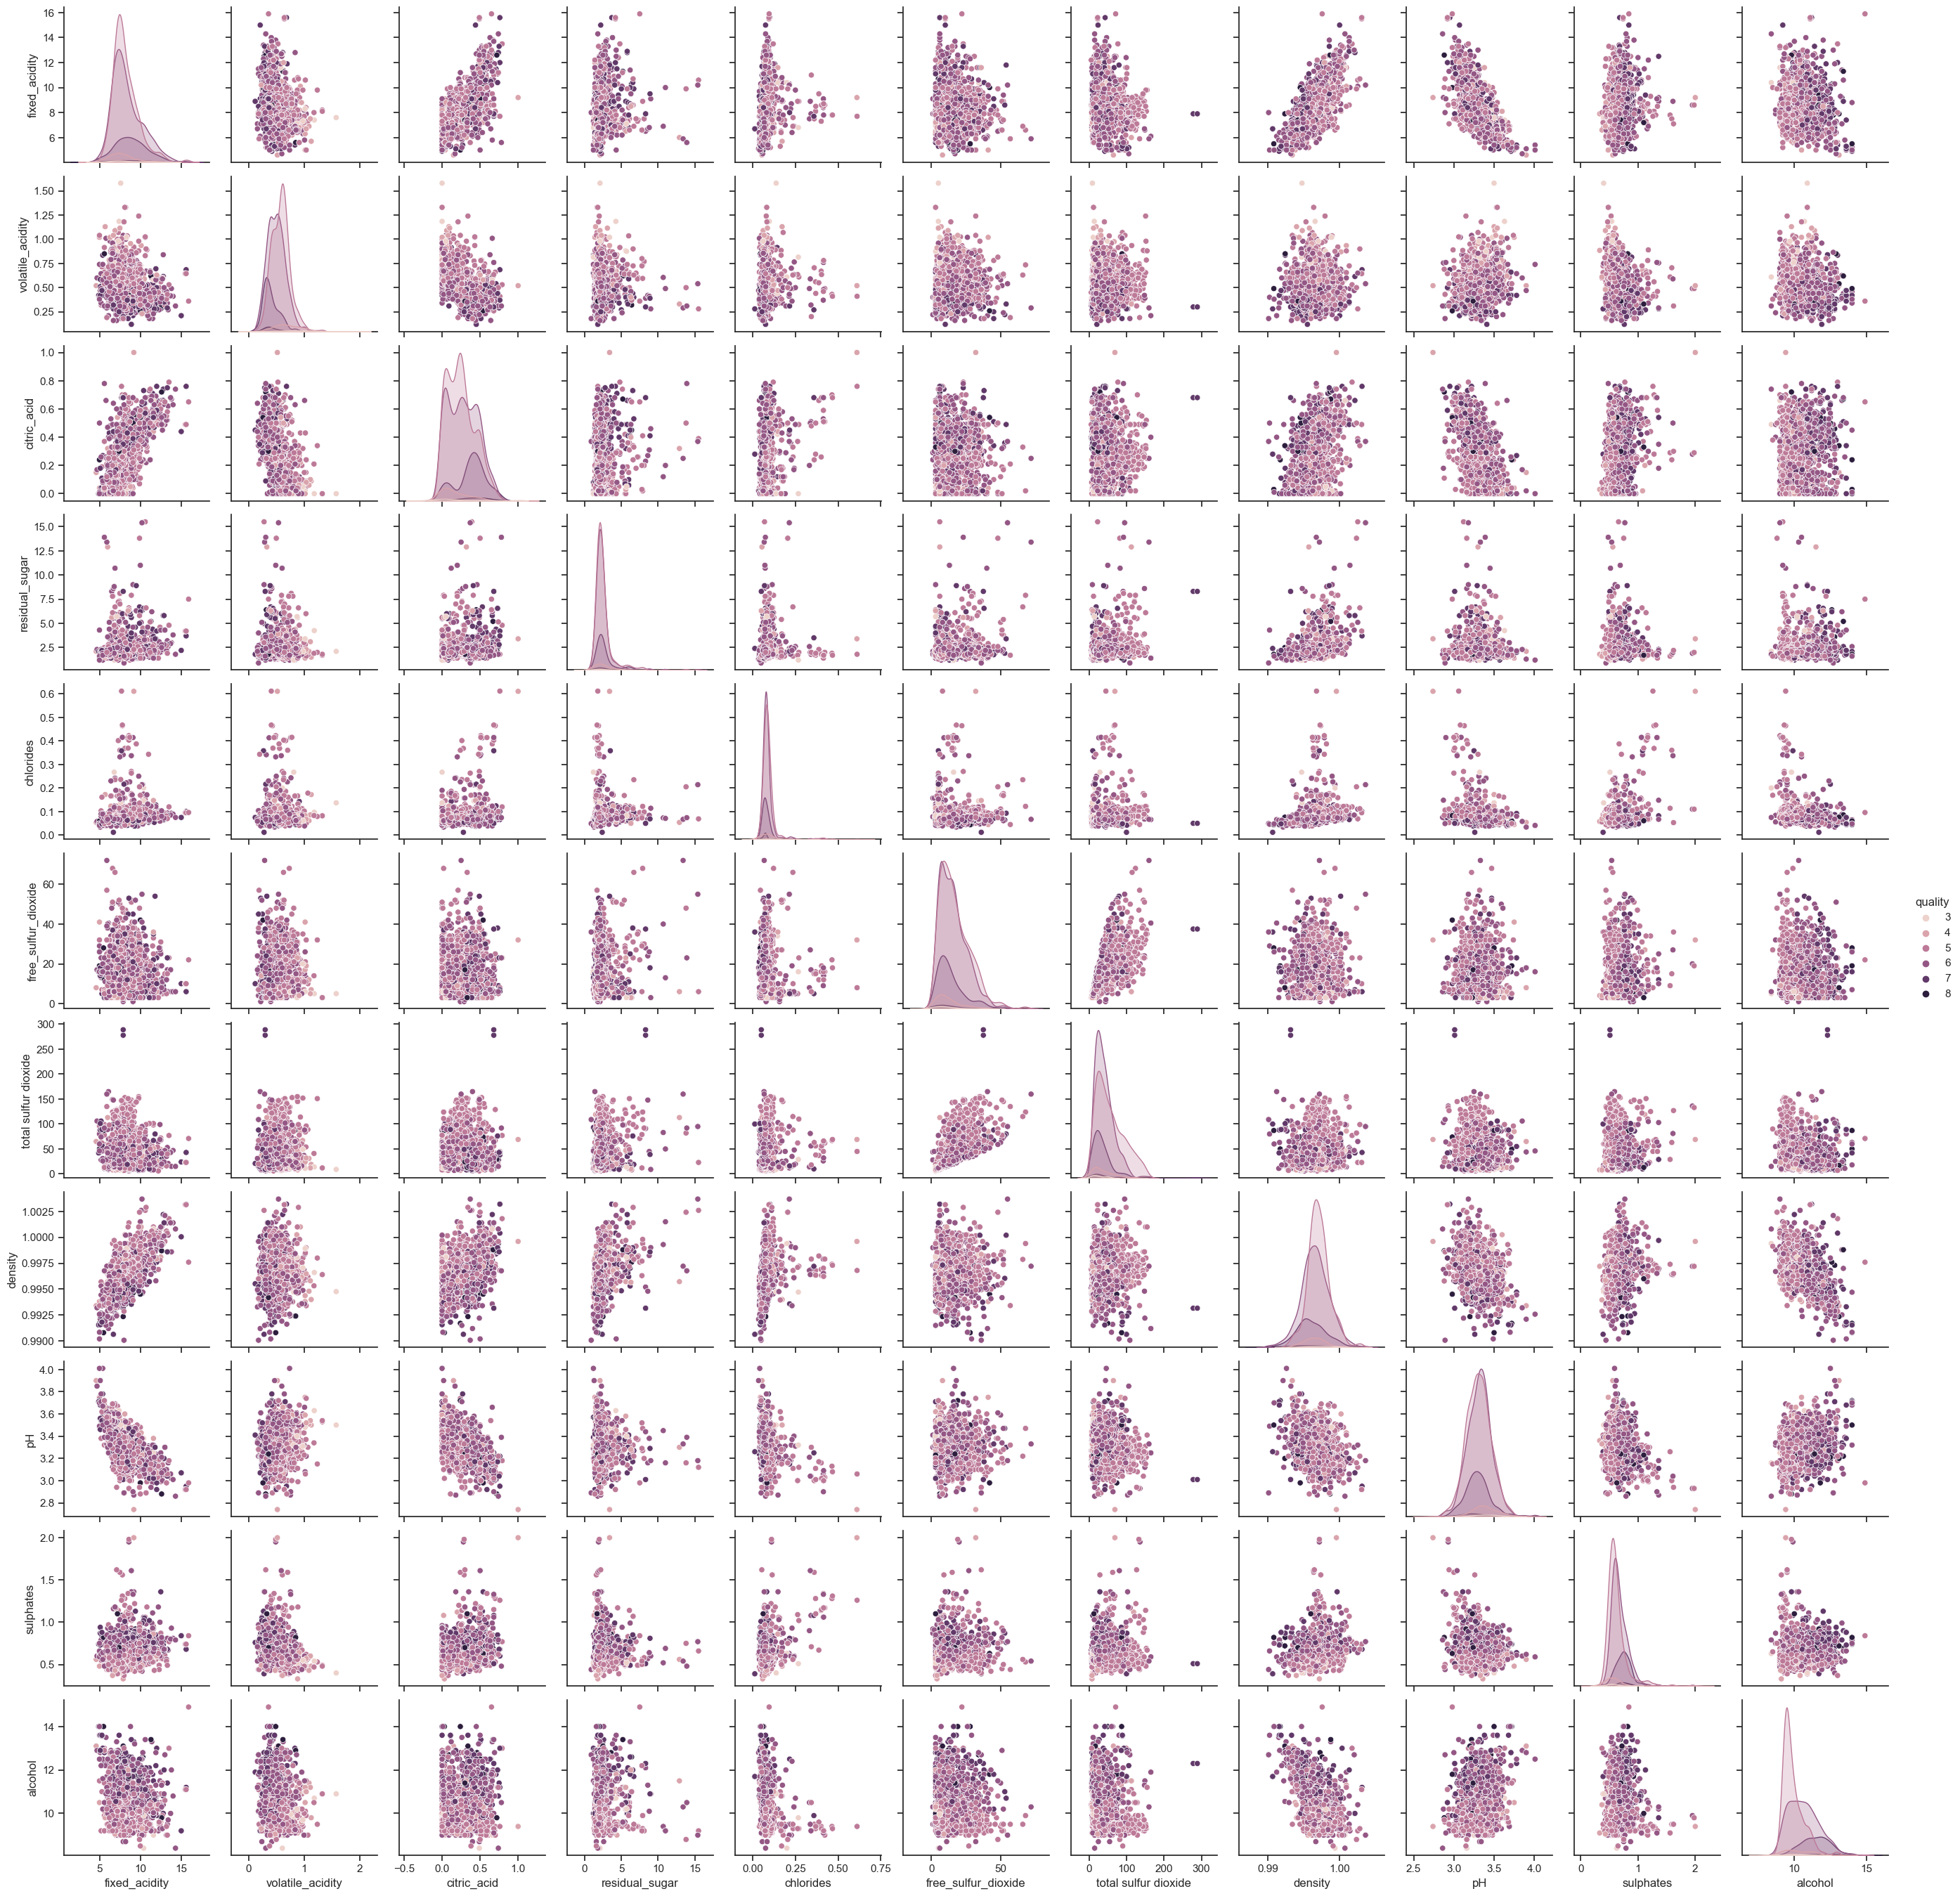

In [26]:
sns.set (style = "ticks")
sns.pairplot (df, hue="quality" )

### Visualización de las variables

In [58]:
def graph_var (var, df) :
    plt.figure()
    plt.hist (df[var], bins = 20, edgecolor = "black")
    plt.xlabel (var)
    plt.ylabel ("Frecuencia")
    plt.title (f"Histograma de {var}")
    hist, bins, _ = plt.hist(df[var], bins=20)
    for i in range(len(hist)):
        plt.text(bins[i], hist[i], str(int(hist[i])), ha='left', va='bottom')
    plt.xlim(df[var].min(), df[var].max())
    mean = df[var].mean()
    median = df[var].median()
    plt.axvline (mean, c = "red", ls = "--", lw = 2, label = "Media")
    plt.axvline (median, c = "blue", ls = "--", lw = 2, label = "Mediana")
    plt.legend()




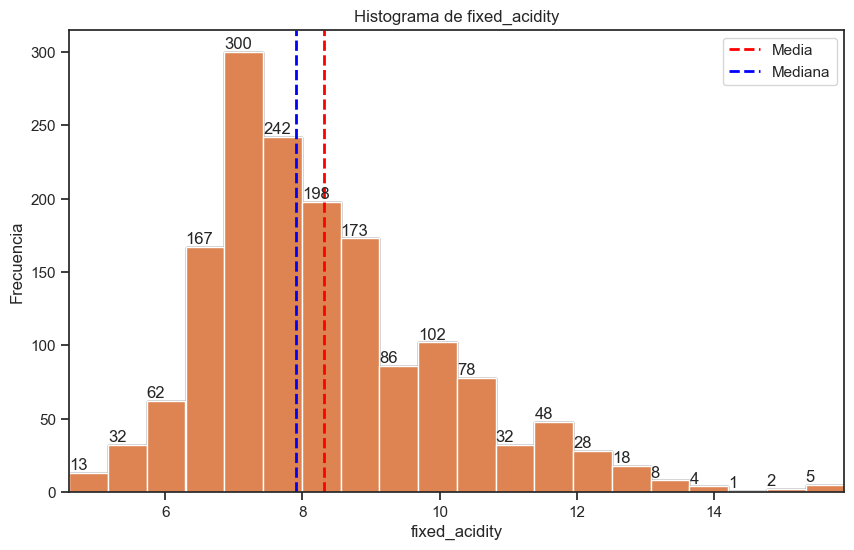

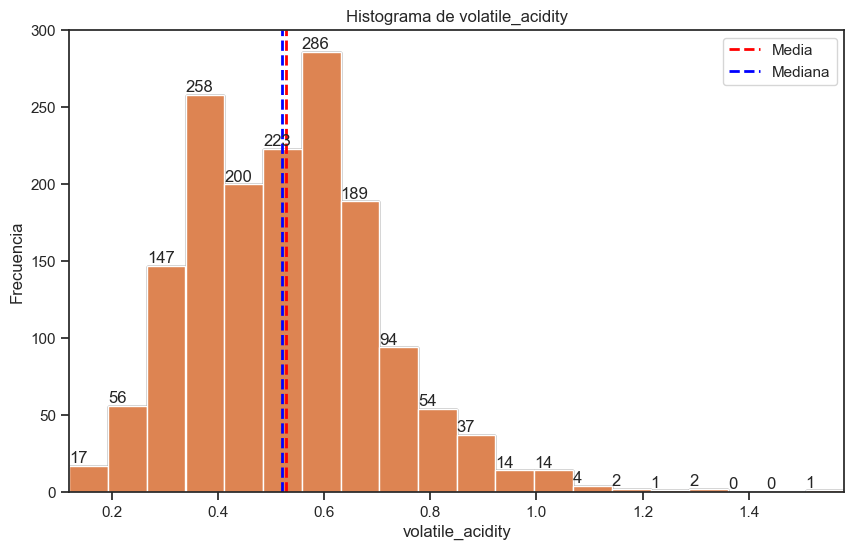

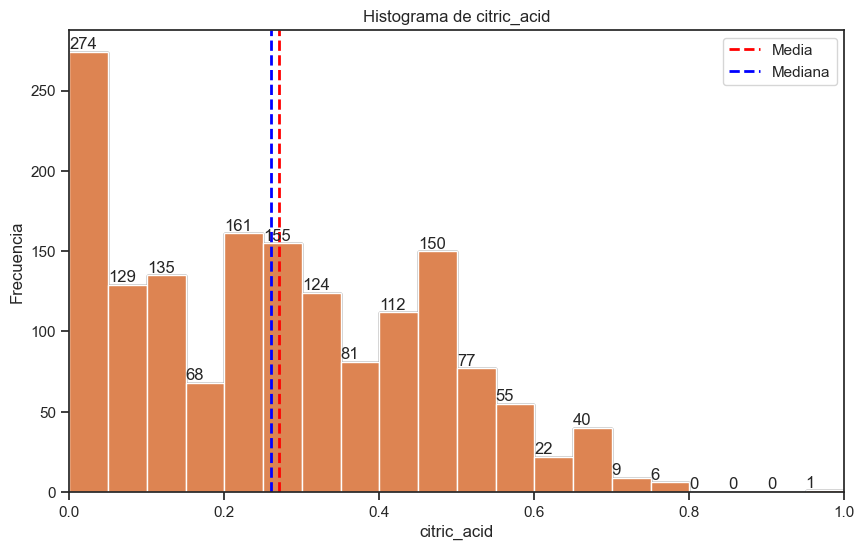

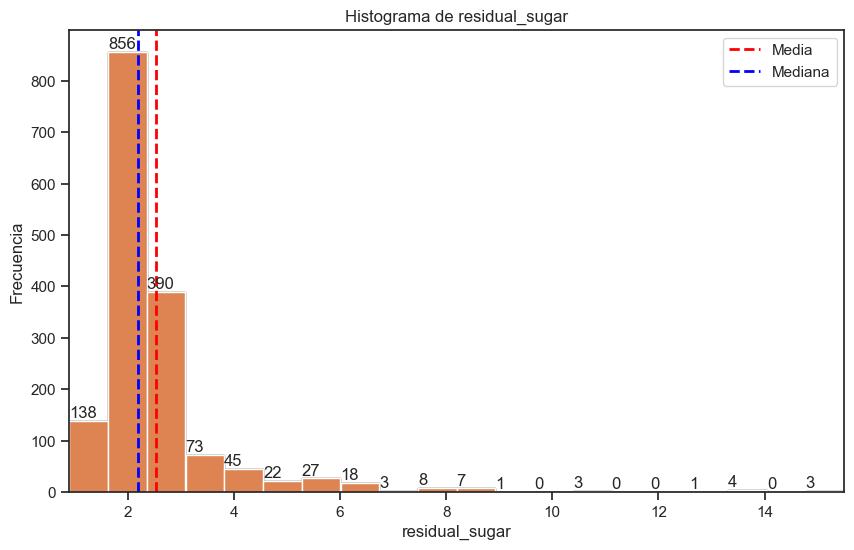

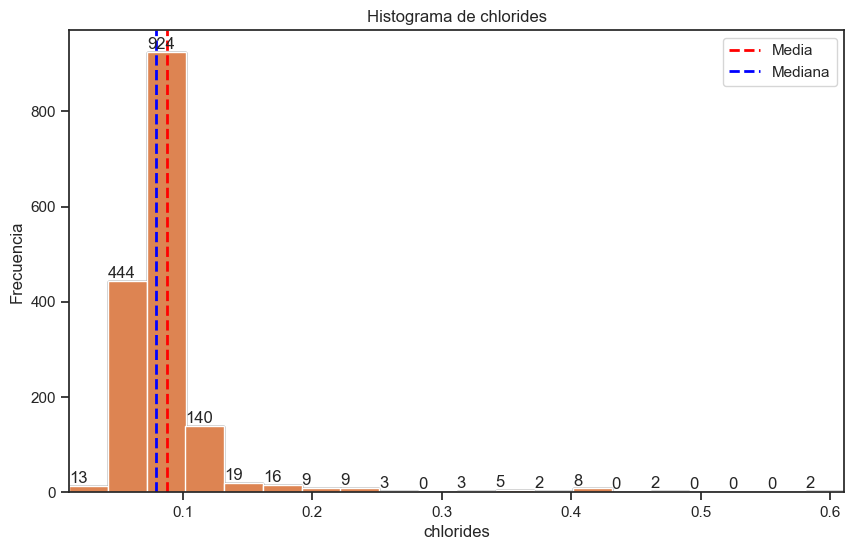

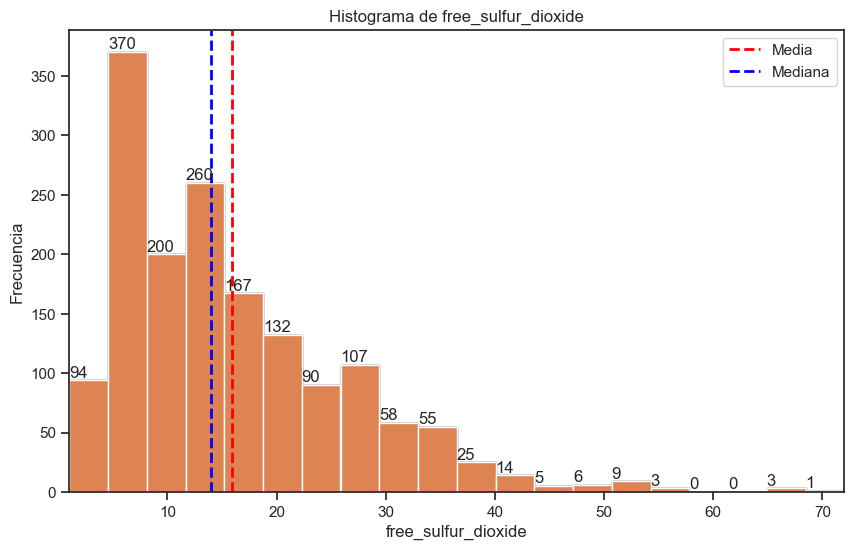

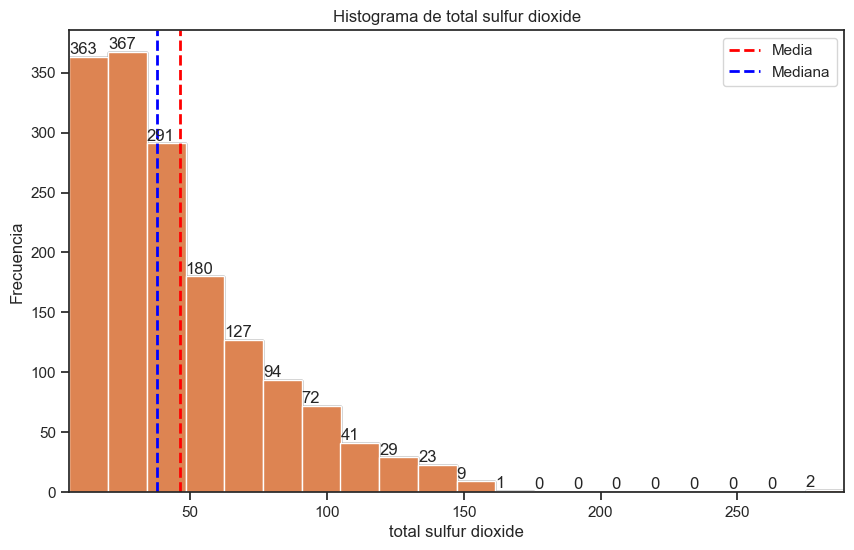

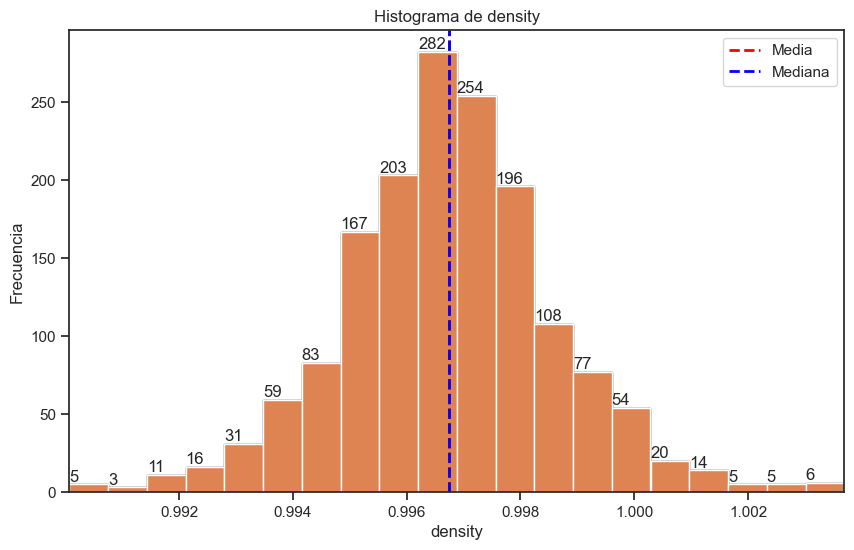

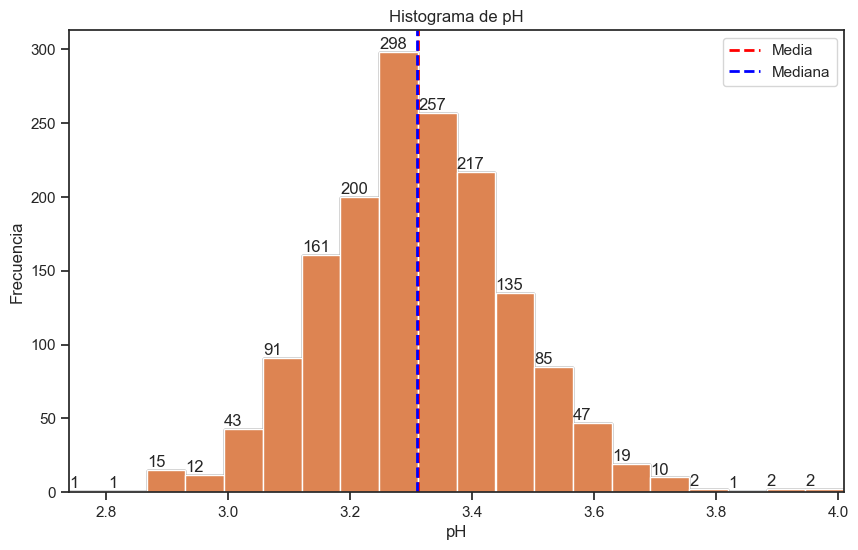

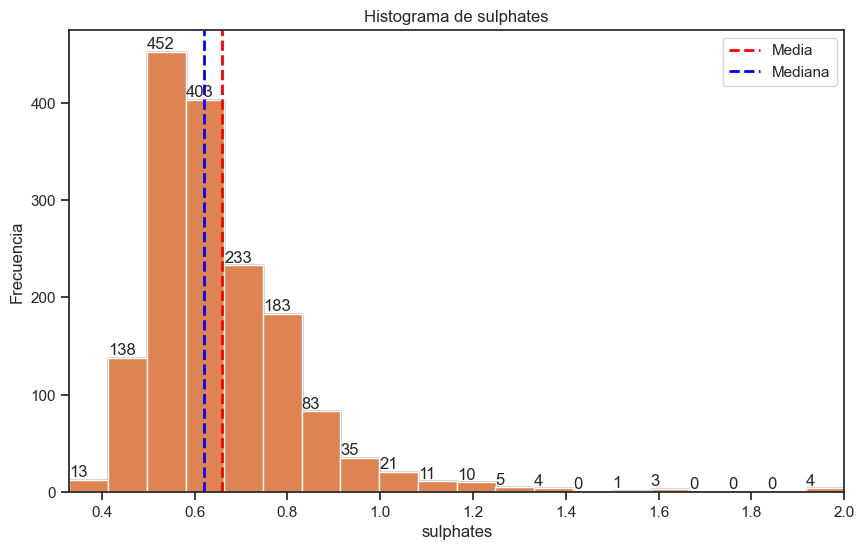

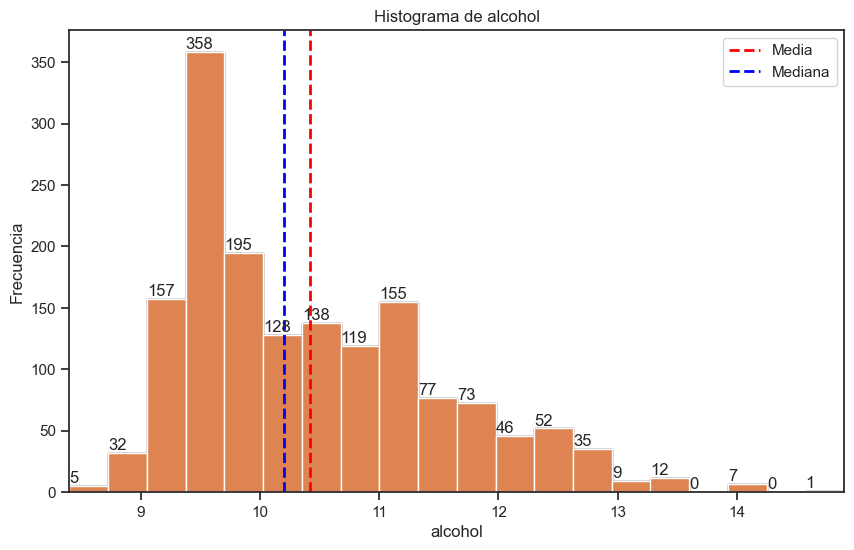

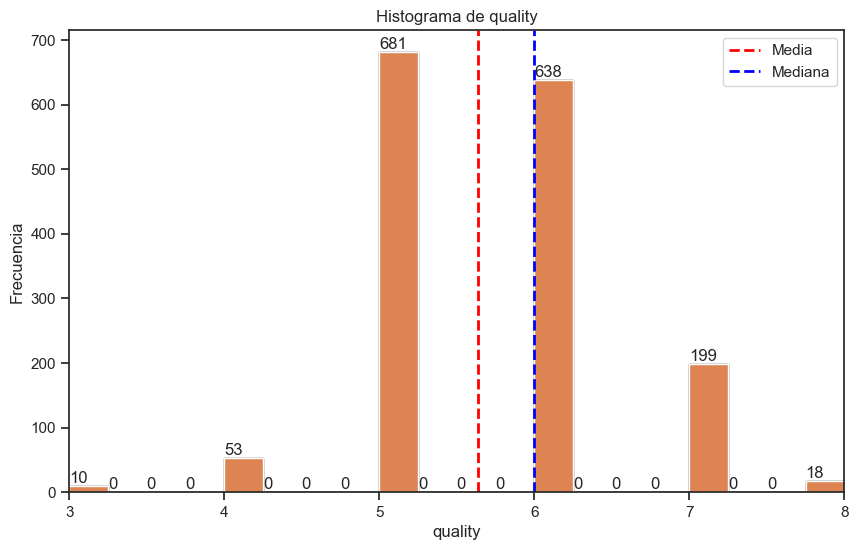

In [63]:
for variable in df.columns:
    graph_var(variable, df)



> Se procederá a escalar las variables

In [64]:
scaler = StandardScaler()
df_scaled = pd.DataFrame (scaler.fit_transform(df), columns = df.columns)
df_scaled

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0         -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
1         -0.298547          1.967442    -1.391472        0.043416   0.223875   
2         -0.298547          1.297065    -1.186070       -0.169427   0.096353   
3          1.654856         -1.384443     1.484154       -0.453218  -0.264960   
4         -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
...             ...               ...          ...             ...        ...   
1594      -1.217796          0.403229    -0.980669       -0.382271   0.053845   
1595      -1.390155          0.123905    -0.877968       -0.240375  -0.541259   
1596      -1.160343         -0.099554    -0.723916       -0.169427  -0.243707   
1597      -1.390155          0.654620    -0.775267       -0.382271  -0.264960   
1598      -1.332702         -1.216849     1.021999        0.752894  -0.434990   

      free_sulfur_dioxide  total sulfur dioxide   density        pH  \
0               -0.466193             -0.379133  0.558274  1.288643   
1                0.872638              0.624363  0.028261 -0.719933   
2               -0.083669              0.229047  0.134264 -0.331177   
3                0.107592              0.411500  0.664277 -0.979104   
4               -0.466193             -0.379133  0.558274  1.288643   
...                   ...                   ...       ...       ...   
1594             1.542054             -0.075043 -0.978765  0.899886   
1595             2.211469              0.137820 -0.862162  1.353436   
1596             1.255161             -0.196679 -0.533554  0.705508   
1597             1.542054             -0.075043 -0.676657  1.677400   
1598             0.203223             -0.135861 -0.666057  0.511130   

      sulphates   alcohol   quality  
0     -0.579207 -0.960246 -0.787823  
1      0.128950 -0.584777 -0.787823  
2     -0.048089 -0.584777 -0.787823  
3     -0.461180 -0.584777  0.450848  
4     -0.579207 -0.960246 -0.787823  
...         ...       ...       ...  
1594  -0.461180  0.072294 -0.787823  
1595   0.601055  0.729364  0.450848  
1596   0.542042  0.541630  0.450848  
1597   0.305990 -0.209308 -0.787823  
1598   0.010924  0.541630  0.450848  

[1599 rows x 12 columns]

## Modelación

In [71]:
X = df_scaled.iloc[:, :-1]
y = df_scaled["quality"]

In [72]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.3, random_state = 42)

## Método RidgeCV

In [73]:
ridge_cv = RidgeCV (cv = 10)
model_ridge = ridge_cv.fit (X_train, y_train)
ridge_mae = median_absolute_error ( model_ridge.predict(X_test), y_test)
ridge_rmse = mean_squared_error (y_test, model_ridge.predict(X_test), squared=False)
ridge_coefs = model_ridge.coef_
ridge_alpha = model_ridge.alpha_
print("RidgeCV:")
print("Coeficientes: ", ridge_coefs)
print("Mejor valor alpha: ", ridge_alpha)
print("MAE: ", ridge_mae)
print("RMSE: ", ridge_rmse)
print("")

RidgeCV:
Coeficientes:  [ 0.05485804 -0.24055892 -0.05471447  0.01554006 -0.09737494  0.05718067
 -0.13185875 -0.04058064 -0.05620677  0.17041424  0.37789709]
Mejor valor alpha:  10.0
MAE:  0.5224055418889855
RMSE:  0.7942346529885654



## Método LassoCV

In [74]:
Lasso_cv = LassoCV (cv = 10)
model_Lasso = Lasso_cv.fit (X_train, y_train)
Lasso_mae = median_absolute_error ( model_Lasso.predict(X_test), y_test)
Lasso_rmse = mean_squared_error (y_test, model_Lasso.predict(X_test), squared=False)
Lasso_coefs = model_Lasso.coef_
Lasso_alpha = model_Lasso.alpha_
print("LassoCV:")
print("Coeficientes: ", Lasso_coefs)
print("Mejor valor alpha: ", Lasso_alpha)
print("MAE: ", Lasso_mae)
print("RMSE: ", Lasso_rmse)
print("")

LassoCV:
Coeficientes:  [ 0.         -0.22908651 -0.01429804  0.         -0.09071513  0.0353404
 -0.11405529 -0.         -0.05440036  0.15405499  0.39137145]
Mejor valor alpha:  0.009882181369156485
MAE:  0.5288596819528028
RMSE:  0.7962676337488973



## Método ElasticNetCV

In [75]:
ElasticNet_cv = ElasticNetCV (cv = 10)
model_ElasticNet = ElasticNet_cv.fit (X_train, y_train)
ElasticNet_mae = median_absolute_error ( model_ElasticNet.predict(X_test), y_test)
ElasticNet_rmse = mean_squared_error (y_test, model_ElasticNet.predict(X_test), squared=False)
ElasticNet_coefs = model_ElasticNet.coef_
ElasticNet_alpha = model_ElasticNet.alpha_
print("ElasticNetCV:")
print("Coeficientes: ", ElasticNet_coefs)
print("Mejor valor alpha: ", ElasticNet_alpha)
print("MAE: ", ElasticNet_mae)
print("RMSE: ", ElasticNet_rmse)
print("")

ElasticNetCV:
Coeficientes:  [ 0.         -0.22681603 -0.01092238  0.         -0.09051859  0.03423305
 -0.11326354 -0.         -0.0518065   0.15308137  0.38731962]
Mejor valor alpha:  0.019764362738312963
MAE:  0.5290091532214947
RMSE:  0.7963622815228163



- El modelo RidgeCV presenta un mejor desempeño,ya que tiene el valor más bajo tanto para el MAE como para el RMSE
- Los atributos fixed_acidity, volatile_acidity, citric_acid y chlorides tienen coeficientes negativos en los 3 modelos, lo que indica que tienen un efecto negativo en la calidad del vino
- Caso contrario sucede con residual_sugar y alcohol que tienen coeficientes positivos en los 3 modelos, lo que indica un efecto positivo en la calidad del vino
- Para el resto de los atributos presentan coeficientes tanto positivos como negativos según el modelo utilizado, lo que sugiere que su efecto en la calidad del vino depende del tipo de regularización utilizado